In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('news.csv')

In [3]:
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
data.shape

(6335, 4)

In [5]:
data.rename(columns={'Unnamed: 0': 'no'}, inplace=True)

In [6]:
data.head()

,no,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [7]:
data['label'].unique()

array(['FAKE', 'REAL'], dtype=object)

In [8]:
data['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [9]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [10]:
x_train, x_test, y_train, y_test= train_test_split(data['text'], data['label'], test_size=0.3)

TfidfVectorizer

In [11]:
x_train.shape

(4434,)

In [12]:
y_train.shape

(4434,)

In [13]:
x_test.shape

(1901,)

In [14]:
y_test.shape

(1901,)

In [15]:
#stopping unneccesary english words like is , or , and etc
tfidV = TfidfVectorizer(stop_words = 'english', max_df = 0.7)

In [16]:
tfidV_train=tfidV.fit_transform(x_train) 
tfidV_test=tfidV.transform(x_test)

In [17]:
#creating models

mod1 = PassiveAggressiveClassifier(max_iter=50)
mod1.fit(tfidV_train,y_train)

mod2 = DecisionTreeClassifier()
mod2.fit(tfidV_train,y_train)

mod3 = RandomForestClassifier()
mod3.fit(tfidV_train,y_train)

mod4= SVC()
mod4.fit(tfidV_train,y_train)

mod5 = LogisticRegression()
mod5.fit(tfidV_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
#Storing Predicted values in pred
pred1 = mod1.predict(tfidV_test)
pred2 = mod2.predict(tfidV_test)
pred3 = mod3.predict(tfidV_test)
pred4 = mod4.predict(tfidV_test)
pred5 = mod5.predict(tfidV_test)

#calculating accuracy and showing in %
score1=accuracy_score(y_test,pred1)
print(f'Passive Aggresive Classifier: {round(score1*100,2)}%')

score2=accuracy_score(y_test,pred2)
print(f'Decision Tree: {round(score2*100,2)}%')

score3=accuracy_score(y_test,pred3)
print(f'Random Forest: {round(score3*100,2)}%')

score4=accuracy_score(y_test,pred4)
print(f'SVC: {round(score4*100,2)}%')

score5=accuracy_score(y_test,pred5)
print(f'Logistic RegressioN: {round(score5*100,2)}%')

Passive Aggresive Classifier: 94.11%
Decision Tree: 81.59%
Random Forest: 90.64%
SVC: 93.58%
Logistic RegressioN: 91.9%


# Visualization

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
m1=confusion_matrix(y_test, pred1, labels=['FAKE', 'REAL'])
m2=confusion_matrix(y_test, pred2, labels=['FAKE', 'REAL'])
m3=confusion_matrix(y_test, pred3, labels=['FAKE', 'REAL'])
m4=confusion_matrix(y_test, pred4, labels=['FAKE', 'REAL'])
m5=confusion_matrix(y_test, pred5, labels=['FAKE', 'REAL'])

In [21]:
m1

array([[935,  54],
       [ 58, 854]], dtype=int64)

In [22]:
y_true = labels=['FAKE', 'REAL']

In [23]:
df_m1 = pd.DataFrame(m1, columns=np.unique(y_true), index = np.unique(y_true))

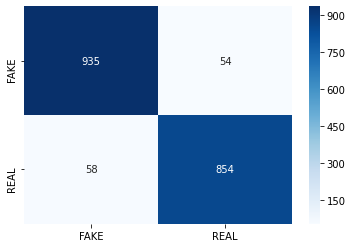

In [24]:
sns.heatmap(df_m1, cmap="Blues", annot=True, fmt='g')

In [25]:
m2

array([[782, 207],
       [143, 769]], dtype=int64)

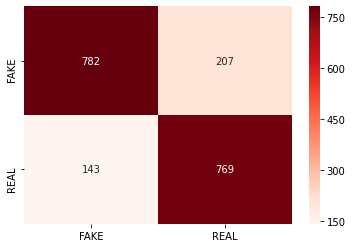

In [26]:
df_m2 = pd.DataFrame(m2, columns=np.unique(y_true), index = np.unique(y_true))
sns.heatmap(df_m2, cmap="Reds", annot=True, fmt='g')

In [27]:
m3

array([[890,  99],
       [ 79, 833]], dtype=int64)

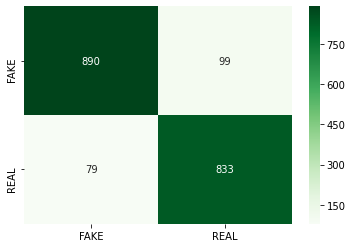

In [28]:
df_m3 = pd.DataFrame(m3, columns=np.unique(y_true), index = np.unique(y_true))
sns.heatmap(df_m3, cmap="Greens", annot=True, fmt='g')

In [29]:
m4

array([[953,  36],
       [ 86, 826]], dtype=int64)

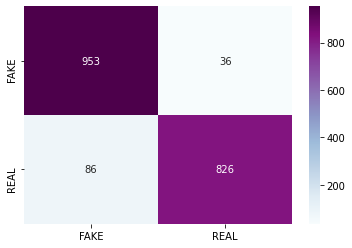

In [30]:
df_m4 = pd.DataFrame(m4, columns=np.unique(y_true), index = np.unique(y_true))
sns.heatmap(df_m4, cmap="BuPu", annot=True, fmt='g') 

In [31]:
m5

array([[931,  58],
       [ 96, 816]], dtype=int64)

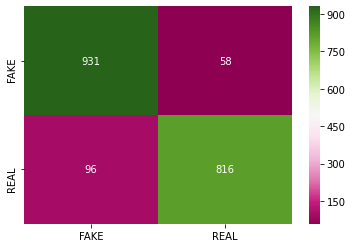

In [32]:
df_m5 = pd.DataFrame(m5, columns=np.unique(y_true), index = np.unique(y_true))
sns.heatmap(df_m5, cmap="PiYG", annot=True, fmt='g')

In [41]:
algos={'PassiveAggressiveClassifier':score1, 'DecisionTreeClassifier':score2,'RandomForestClassifier':score3,
        'SVC':score4,'LogisticRegression':score5}

In [42]:
algos

{'PassiveAggressiveClassifier': 0.941083640189374,
 'DecisionTreeClassifier': 0.8158863755917938,
 'RandomForestClassifier': 0.9063650710152551,
 'SVC': 0.9358232509205682,
 'LogisticRegression': 0.9189900052603893}

<BarContainer object of 5 artists>

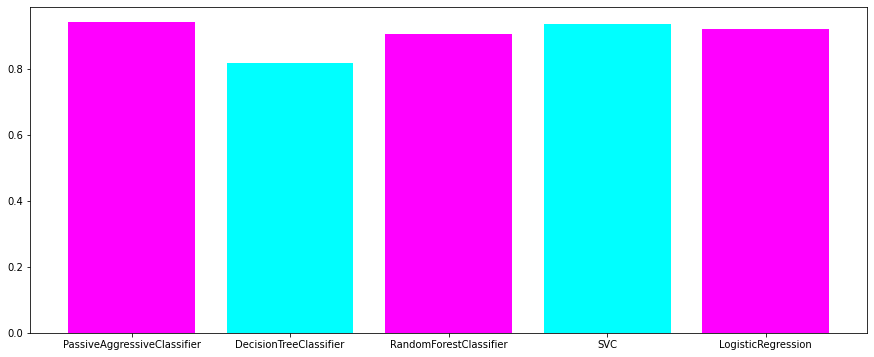

In [70]:
plt.figure(figsize=(15,6))
plt.bar(algos.keys(), algos.values(), color=('magenta', 'cyan'))
